# Patient_data Notebook
---
patient data notebook with working notes.

see `get_patient.py` for consolidated functions

### change wd

In [3]:
import os


os.chdir('/Users/tomdoyle/')
os.getcwd()


'/Users/tomdoyle'

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import genepy matrix 
genepy = pd.read_table("Documents/University/Southampton/Course/BIOL6068-Research_Project/Data/IBD_genepy1_4_2022.matrix")

In [5]:
genepy

,Samid,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,AP0013,2.477012,0.503588,1.228310,0.227524,1.540578,0.991339,0.861377,0.000000,0.000000,...,0.000000,0.559446,0.303310,0.0,0.182126,0.000000,0.234417,0.000000,2.082438,0.000000
1,AP0030,4.916212,0.000000,0.309080,1.851204,0.000000,0.755479,0.500801,0.555647,0.000000,...,0.000000,0.362662,0.303310,0.0,0.298613,0.000000,0.234417,0.000000,2.495394,0.000000
2,AP0045,2.897899,0.000000,0.309080,0.724660,0.000000,0.277840,0.500801,0.000000,0.000000,...,0.000000,0.000000,0.303310,0.0,0.182126,0.207940,0.000000,0.000000,0.091227,0.925452
3,AP0046,4.916212,0.000000,0.309080,2.565333,0.593071,0.277840,0.500801,0.555647,0.000000,...,0.000000,0.000000,0.303310,0.0,0.182126,0.207940,0.278437,0.000000,0.091227,0.000000
4,AP0055,2.477012,0.000000,0.469568,1.545090,0.342100,0.277840,1.329479,0.555647,0.000000,...,0.000000,0.362662,0.303310,0.0,0.182126,0.207940,0.000000,0.000000,3.635221,0.925452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,SORL0038,2.477012,1.046694,0.574673,2.805638,0.000000,0.991339,0.500801,0.000000,1.705401,...,0.000000,0.000000,0.150703,0.0,1.423412,0.207940,0.000000,0.000000,0.000000,0.000000
1082,SORL0039,2.477012,0.000000,0.883753,1.744000,0.000000,0.991339,0.500801,0.000000,0.000000,...,2.670446,0.613502,0.000000,0.0,2.224221,0.266362,0.278437,0.565311,0.000000,0.000000
1083,SORL0040,0.037810,0.000000,0.469568,1.974212,0.342100,0.277840,0.500801,1.082115,0.000000,...,0.000000,0.000000,0.303310,0.0,0.000000,0.000000,0.234417,2.312618,2.575849,0.000000
1084,SORL0041,0.037810,0.000000,0.000000,1.488071,0.342100,0.277840,0.861377,0.000000,0.000000,...,0.000000,0.000000,0.832495,0.0,0.297451,0.266362,0.278437,0.000000,1.991212,0.000000


In [6]:
# function to get genes and scores for a patient
def get_patient(row_number):
    x = genepy.iloc[row_number, 2:].to_frame(name='gen_score')
    x['gene'] = x.index
    return x

get_patient(0)

,gen_score,gene
A1CF,0.503588,A1CF
A2M,1.22831,A2M
A2ML1,0.227524,A2ML1
A3GALT2,1.540578,A3GALT2
A4GALT,0.991339,A4GALT
...,...,...
ZYG11A,0.0,ZYG11A
ZYG11B,0.234417,ZYG11B
ZYX,0.0,ZYX
ZZEF1,2.082438,ZZEF1


In [ ]:
# function to return scores
def get_scores_above_zero(df, row_number):
    for i in df.iloc[row_number, 2:]:
        if i > 0: 
            print(i)

get_scores_above_zero(genepy, 0)

In [8]:
# function to return names and scores
def get_genes_with_scores(df, row_number):
    x = df.iloc[row_number, 2:] > 0
    return x.index[x]
                    
get_genes_with_scores(genepy, 19)


Index(['A2ML1', 'A4GNT', 'AADAC', 'AADACL3', 'AAGAB', 'AAK1', 'AARD', 'AARS2',
       'AASDH', 'AASS',
       ...
       'ZSCAN5B', 'ZSCAN5C', 'ZSWIM2', 'ZSWIM3', 'ZSWIM5', 'ZSWIM9', 'ZXDC',
       'ZYG11A', 'ZYG11B', 'ZZEF1'],
      dtype='object', length=7695)

In [10]:
print(get_genes_with_scores(genepy, 2))

Index(['A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AADAC', 'AADACL3', 'AAGAB', 'AAK1',
       'AARD', 'AARS2',
       ...
       'ZSWIM2', 'ZSWIM3', 'ZSWIM4', 'ZSWIM5', 'ZSWIM9', 'ZWINT', 'ZXDC',
       'ZYG11A', 'ZZEF1', 'ZZZ3'],
      dtype='object', length=7655)


### Get String IDs

In [ ]:
import requests ## python -m pip install requests

string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv-no-header"
method = "get_string_ids"

# import gene names
gene_list = get_genes_with_scores(genepy, 9)

# human NCBI identifier 9606
species_id = 9606

## Set parameters
params = {
    "identifiers" : "\r".join(gene_list), # your protein list
    "species" : species_id, # species NCBI identifier 
    "limit" : 1, # only one (best) identifier per input protein
    "echo_query" : 1, # see your input identifiers in the output
    "caller_identity" : "Research_Project" # your app name
}

## Construct URL
request_url = "/".join([string_api_url, output_format, method])

## Call STRING
results = requests.post(request_url, data=params)

# saves string_id into a list
string_id = []
for line in results.text.strip().split("\n"):
        l = line.split("\t")
        string_identifier = l[2]
        string_id.append(string_identifier)

string_id

In [14]:
import pandas as pd

output_format = "tsv-no-header"
method = "network"

## Construct URL
request_url = "/".join([string_api_url, output_format, method])

# set confience_score between 0-1
confidence_score = 0.6

## Set parameters
my_genes = string_id

params = {
    "identifiers" : "%0d".join(my_genes), # your protein
    "species" : species_id, # species NCBI identifier 
    "caller_identity" : "Research_Project" # your app name
}

""" other params
"required_score" :	# threshold of significance to include a interaction, a number between 0 and 1000 (default depends on the network)
    "network_type" :	# network type: functional (default), physical
    "add_nodes"	: # adds a number of proteins with to the network based on their confidence score
    "show_query_node_labels" :	# when available use submitted names in the preferredName column when (0 or 1) (default:0)
    """

## Call STRING
response = requests.post(request_url, data=params)

# creates data frame with column headings 
patient_df = pd.DataFrame(columns = ['stringId_A', 'stringId_B', 'preferredName_A', 'preferredName_B', 'ncbiTaxonId', 'score', 'nscore', 'fscore', 'pscore', 'ascore', 'escore', 'dscore', 'tscore'])

for line in response.text.strip().split("\n"):
    # seperates each line into list
    l = line.strip().split("\t")
    
    # adds each line to the data frame 
    patient_df.loc[len(patient_df)] = l

patient_df = patient_df.drop_duplicates(subset=['preferredName_A', 'preferredName_B'], keep='first')
patient_df.head()
patient_df.iloc[1]

ValueError: cannot set a row with mismatched columns

### test

In [15]:
import pandas as pd

output_format = "tsv-no-header"
method = "network"

## Construct URL
request_url = "/".join([string_api_url, output_format, method])

# set confience_score between 0-1
confidence_score = 0.6

## Set parameters
my_genes = string_id

params = {
    "identifiers" : "%0d".join(my_genes), # your protein
    "species" : species_id, # species NCBI identifier 
    "caller_identity" : "Research_Project" # your app name
}

""" other params
"required_score" :	# threshold of significance to include a interaction, a number between 0 and 1000 (default depends on the network)
    "network_type" :	# network type: functional (default), physical
    "add_nodes"	: # adds a number of proteins with to the network based on their confidence score
    "show_query_node_labels" :	# when available use submitted names in the preferredName column when (0 or 1) (default:0)
    """

## Call STRING
response = requests.post(request_url, data=params)

# creates data frame with column headings 
patient_df = pd.DataFrame(columns = ['stringId_A', 'stringId_B', 'preferredName_A', 'preferredName_B', 'ncbiTaxonId', 'score', 'nscore', 'fscore', 'pscore', 'ascore', 'escore', 'dscore', 'tscore'])

for line in response.text.strip().split("\n"):
    
    '''
    # seperates each line into list
    l = line.strip().split("\t")
    s = pd.Series(l, index = patient_df.columns)
    # adds each line to the data frame 
    patient_df = patient_df.append(s, ignore_index=True)
    '''

patient_df = patient_df.drop_duplicates(subset=['preferredName_A', 'preferredName_B'], keep='first')
patient_df.head()



ValueError: Length of values (2) does not match length of index (13)

### Define function to pull data frame into other scripts

AttributeError: 'Response' object has no attribute 'head'

### Create network using NetworkX and patient gene names

In [22]:
import networkx as nx

G = nx.Graph()
G = nx.from_pandas_edgelist(patient_df, 'preferredName_A', 'preferredName_B')

patient_df

,stringId_A,stringId_B,preferredName_A,preferredName_B,ncbiTaxonId,score,nscore,fscore,pscore,ascore,escore,dscore,tscore
0,9606.ENSP00000200457,9606.ENSP00000220751,TRIP6,RIPK2,9606,0.84,0,0,0,0.079,0.078,0.8,0.171
1,9606.ENSP00000200457,9606.ENSP00000220751,TRIP6,RIPK2,9606,0.84,0,0,0,0.079,0.078,0.8,0.171
2,9606.ENSP00000211287,9606.ENSP00000335153,MAPK13,HSP90AA1,9606,0.416,0,0,0,0.054,0.227,0,0.266
3,9606.ENSP00000211287,9606.ENSP00000335153,MAPK13,HSP90AA1,9606,0.416,0,0,0,0.054,0.227,0,0.266
4,9606.ENSP00000211287,9606.ENSP00000300589,MAPK13,NOD2,9606,0.684,0,0,0,0.053,0,0.65,0.124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,9606.ENSP00000375767,9606.ENSP00000376849,CARD8,CASP5,9606,0.979,0,0,0,0.065,0,0.9,0.794
158,9606.ENSP00000376849,9606.ENSP00000477613,CASP5,BIRC2,9606,0.42,0,0,0,0.065,0.193,0,0.294
159,9606.ENSP00000376849,9606.ENSP00000477613,CASP5,BIRC2,9606,0.42,0,0,0,0.065,0.193,0,0.294
160,9606.ENSP00000376849,9606.ENSP00000478516,CASP5,NLRP1,9606,0.998,0,0,0,0.062,0.462,0.9,0.969


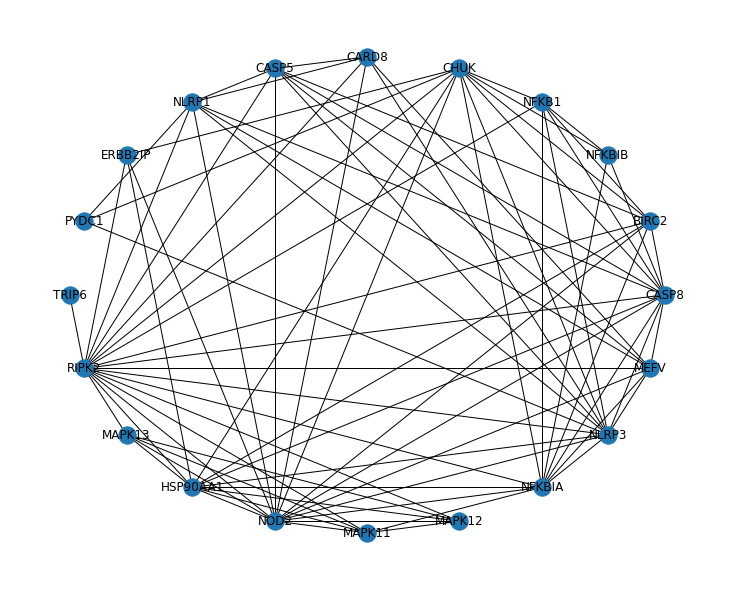

In [23]:
# display network graph
from matplotlib.pyplot import figure

figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [24]:
# list of node connections for each gene 
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])

s = pd.Series(leaderboard, name='connections')
patient_nodes = s.to_frame().sort_values('connections', ascending=False)

patient_nodes

,connections
RIPK2,17
NOD2,15
CASP8,12
NLRP3,12
HSP90AA1,11
CHUK,11
NFKBIA,11
CASP5,8
BIRC2,8
MEFV,8


In [1]:
import get_data 
import get_patient
import get_PPI
import pandas as pd
from get_data import genepy_df


            A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT     A4GNT  \
Samid                                                                          
AP0013  0.097623  0.027245  0.107498  0.011378  0.041579  0.028535  0.055493   
AP0030  0.134882  0.000000  0.018830  0.064448  0.000000  0.015138  0.022460   
AP0045  0.107196  0.000000  0.025388  0.034014  0.000000  0.007506  0.030282   
AP0046  0.179652  0.000000  0.025081  0.118953  0.014841  0.007415  0.029915   
AP0055  0.091878  0.000000  0.038677  0.072722  0.008690  0.007527  0.080610   

            AAAS  AACS     AADAC  ...  ZW10    ZWILCH     ZWINT  ZXDA  \
Samid                             ...                                   
AP0013  0.000000   0.0  0.000000  ...   0.0  0.026087  0.010998   0.0   
AP0030  0.018639   0.0  0.004263  ...   0.0  0.011772  0.007656   0.0   
AP0045  0.000000   0.0  0.121555  ...   0.0  0.000000  0.010323   0.0   
AP0046  0.024826   0.0  0.000000  ...   0.0  0.000000  0.010197   0.0   
A

In [5]:
get_patient.get_scores_above_zero_as_series(genepy_norm_loeuf, 'PR0074').to_csv('../Data/PR0074.csv', index=True,header=False)

In [1]:
import get_data
import get_patient
from get_data import CD_subset

In [ ]:
import pandas as pd
import numpy as 

In [5]:

AP0276 = get_patient.get_scores_above_zero_as_series(CD_subset, 'AP0276')

In [10]:
AP0276.sort_values(ascending=False).head(60)

ZNF219      1.516182
MUC19       1.016260
PLXNA3      0.971732
MACF1       0.853219
RSF1        0.850441
COL5A1      0.794246
MRC1        0.768139
CCDC22      0.749071
HIVEP2      0.745745
MUC5B       0.726976
HEATR1      0.711294
AHSA1       0.678538
CPSF6       0.650430
PCF11       0.628770
GNB1        0.622837
GRIPAP1     0.591307
ANK3        0.588032
LAMA5       0.582733
ATRX        0.556311
RNF126      0.547153
HELZ        0.530896
BIRC6       0.514013
CDC73       0.513245
CRIM1       0.504544
ARMCX4      0.501885
EHMT1       0.487194
MUC16       0.484459
ZC3H4       0.480152
XPO7        0.477353
ZNF750      0.475612
PLXNB1      0.473221
CTBP1       0.472843
HNRNPH1     0.469056
CHD2        0.461947
CUX1        0.454628
CASZ1       0.453827
JRK         0.445351
YTHDC2      0.443401
ZNF462      0.439846
PLXND1      0.437706
SMG1        0.437162
NPEPL1      0.434661
ACAN        0.430874
HIVEP1      0.430647
GDF5        0.418996
PHACTR3     0.408543
ZNF407      0.399161
CACNA1F     0

In [14]:
from get_data import UC_subset

PR0179 = get_patient.get_scores_above_zero_as_series(UC_subset, 'PR0179')
PR0179.sort_values(ascending=False).head(60)


TTN         2.113969
FRMPD4      1.835315
ACTA2       1.610737
PLXNA3      1.588109
EHMT1       1.414705
PRKDC       1.414111
ZNF219      1.375332
ANK3        1.263863
MRC1        1.246425
CCDC22      1.224213
ANK2        1.173749
AHSA1       1.108939
CPSF6       1.063002
PREX1       1.049462
SPTBN1      1.035802
MUC19       1.016260
PYGO1       1.008402
RAD54L2     0.988413
GRIPAP1     0.984463
HEATR1      0.970603
RNF126      0.953624
GRIN2B      0.910786
SRRM2       0.906226
CDC73       0.838799
ANKRD12     0.813361
RORB        0.812628
MUC16       0.803408
PLXNB1      0.773389
MED14       0.766718
ZNF750      0.755145
TMEM132B    0.735944
PHIP        0.724062
SMG1        0.714456
TOPBP1      0.683071
ZNF541      0.667368
CACNA1F     0.643783
POLR2A      0.639920
SUPT6H      0.638388
ZNF407      0.614929
SBNO1       0.614685
EIF3D       0.611040
CUX1        0.608516
KLF7        0.608031
SZT2        0.607721
CTBP1       0.606134
SENP2       0.601181
PLEC        0.594124
LRP1        0

In [19]:
sorted_sub = CD_subset.sort_values(by=['CNOT1','CNOT3','KDM3B'])

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
def pathway_genes(file):
    my_file = open(file, "r")
    data = my_file.read()
    data_list = data.split("\n")
    return(data_list)

In [24]:
threePR = pathway_genes("../Data/rna_reg.txt")
subPR = sorted_sub.loc[:, sorted_sub.columns.isin(threePR)]

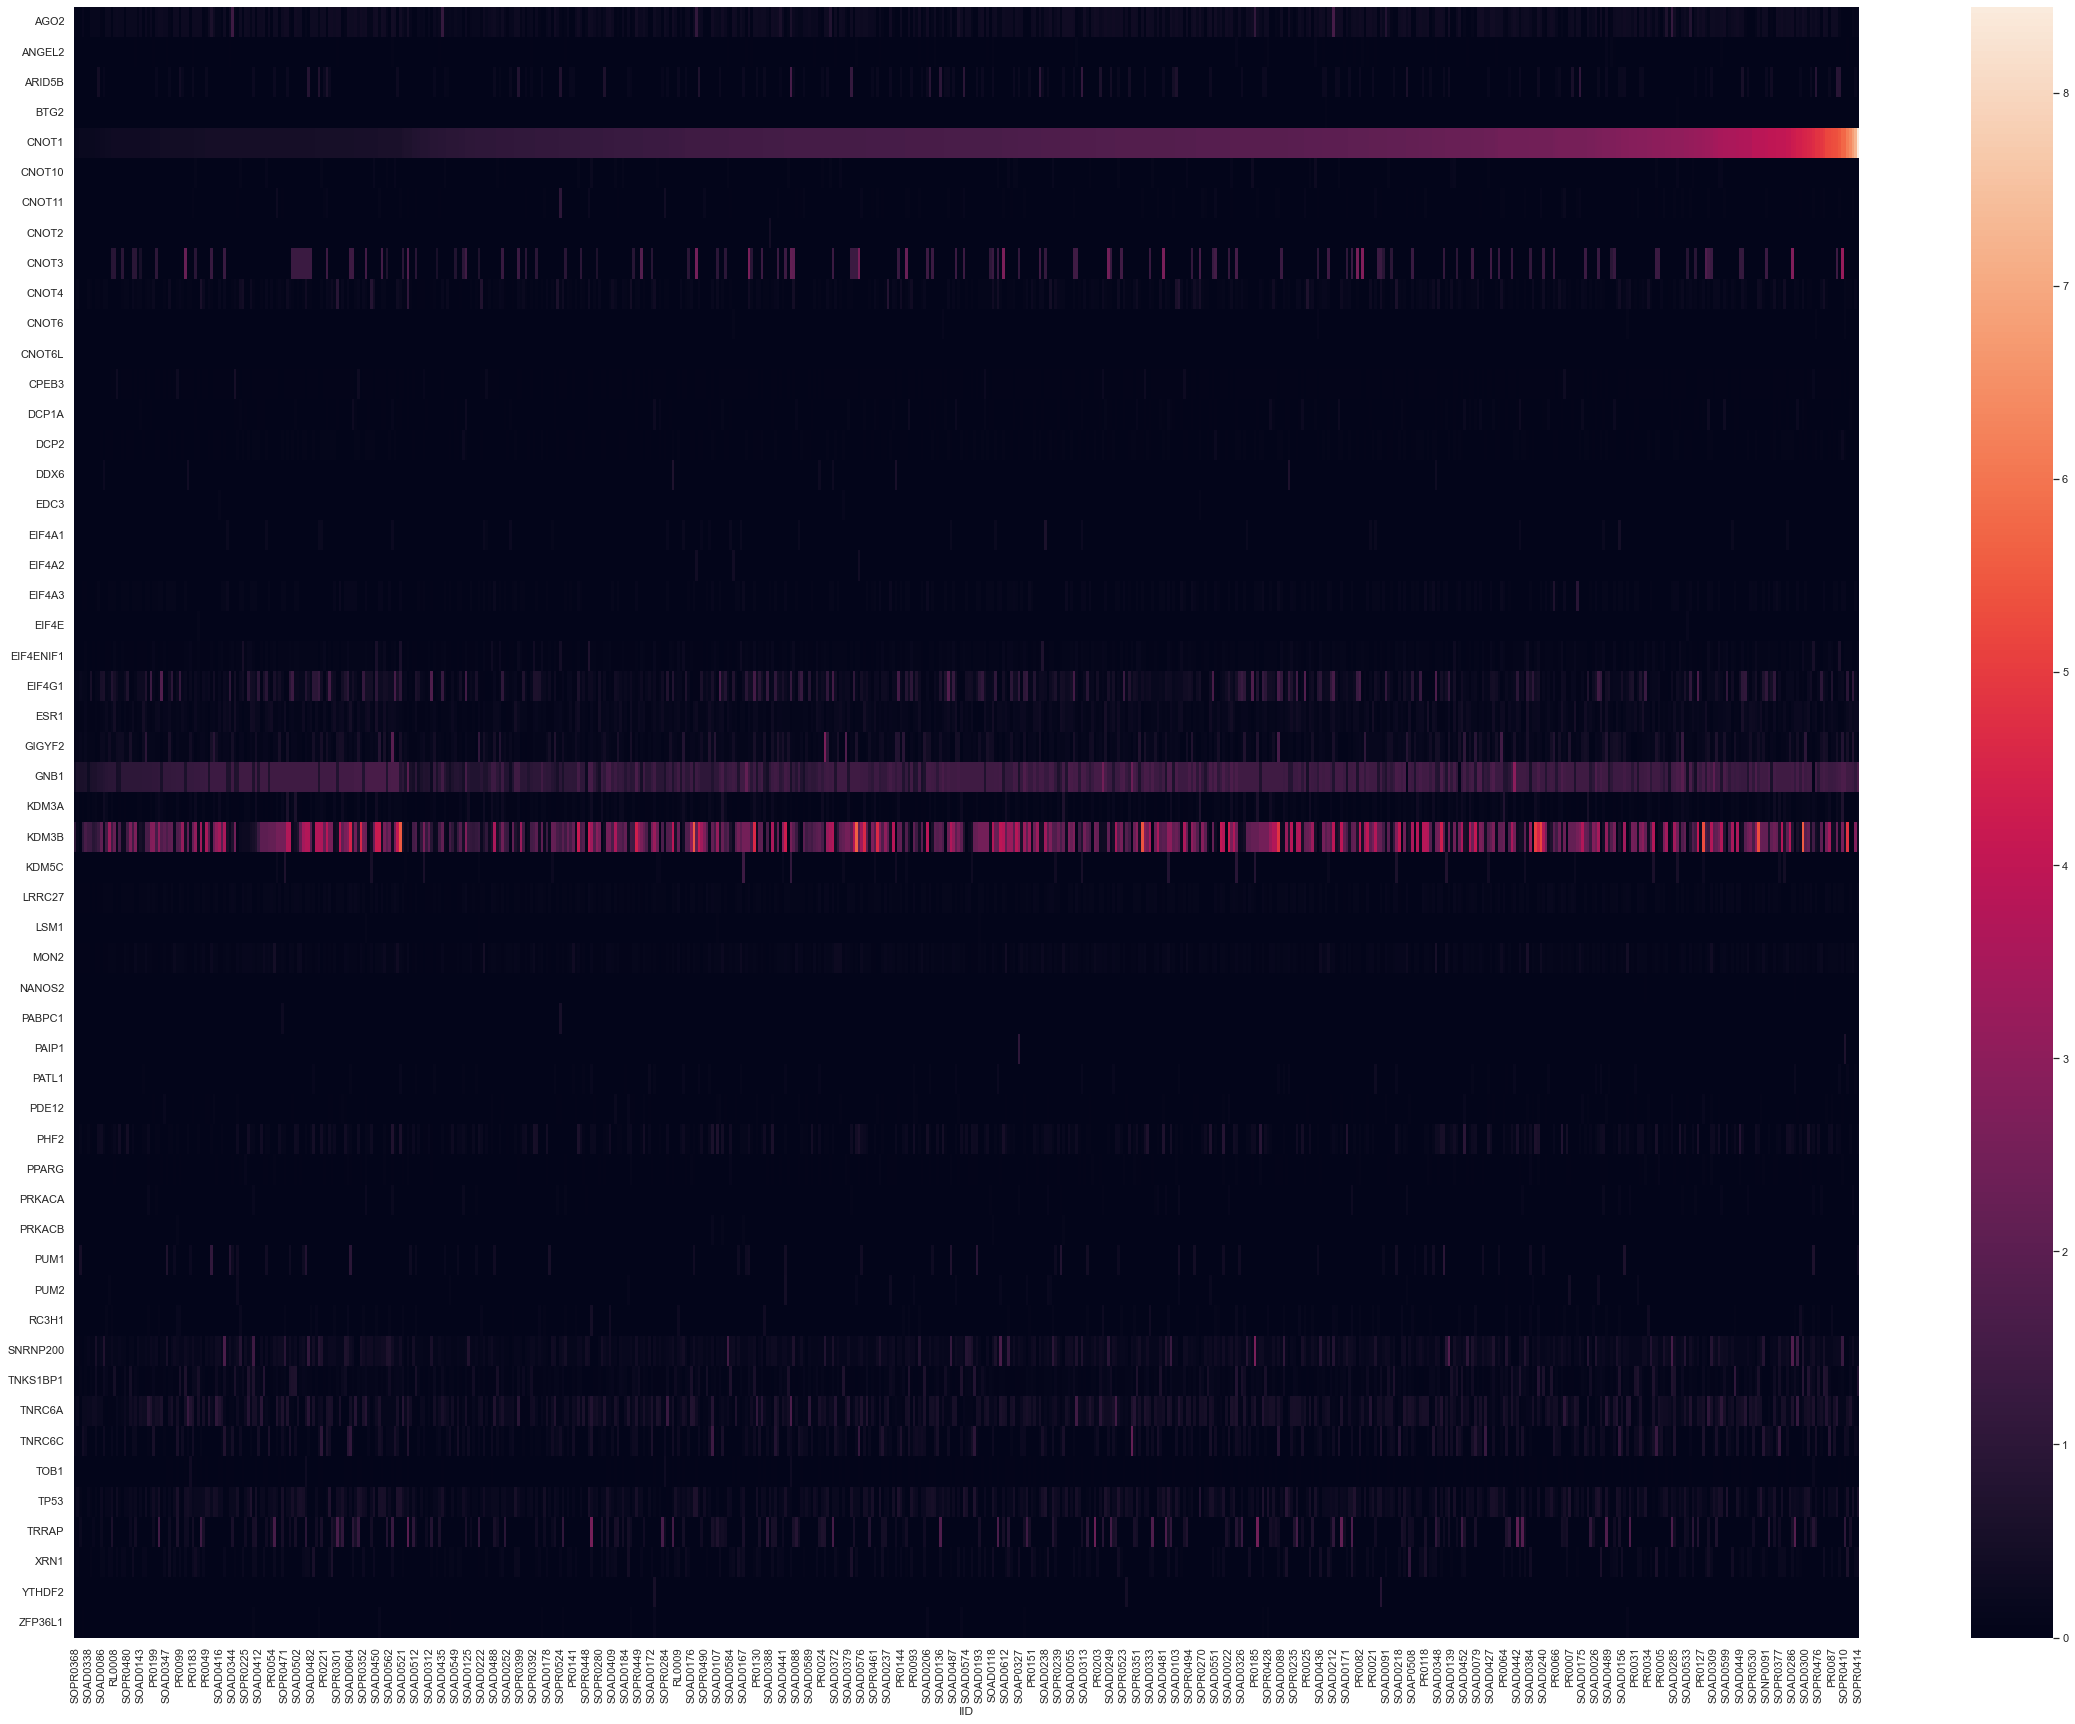

In [26]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPR.transpose())
plt.savefig('rnareg.png', dpi=300)

In [29]:
cnot = pathway_genes("../Data/cnot1.txt")
subPR = sorted_sub.loc[:, sorted_sub.columns.isin(cnot)]

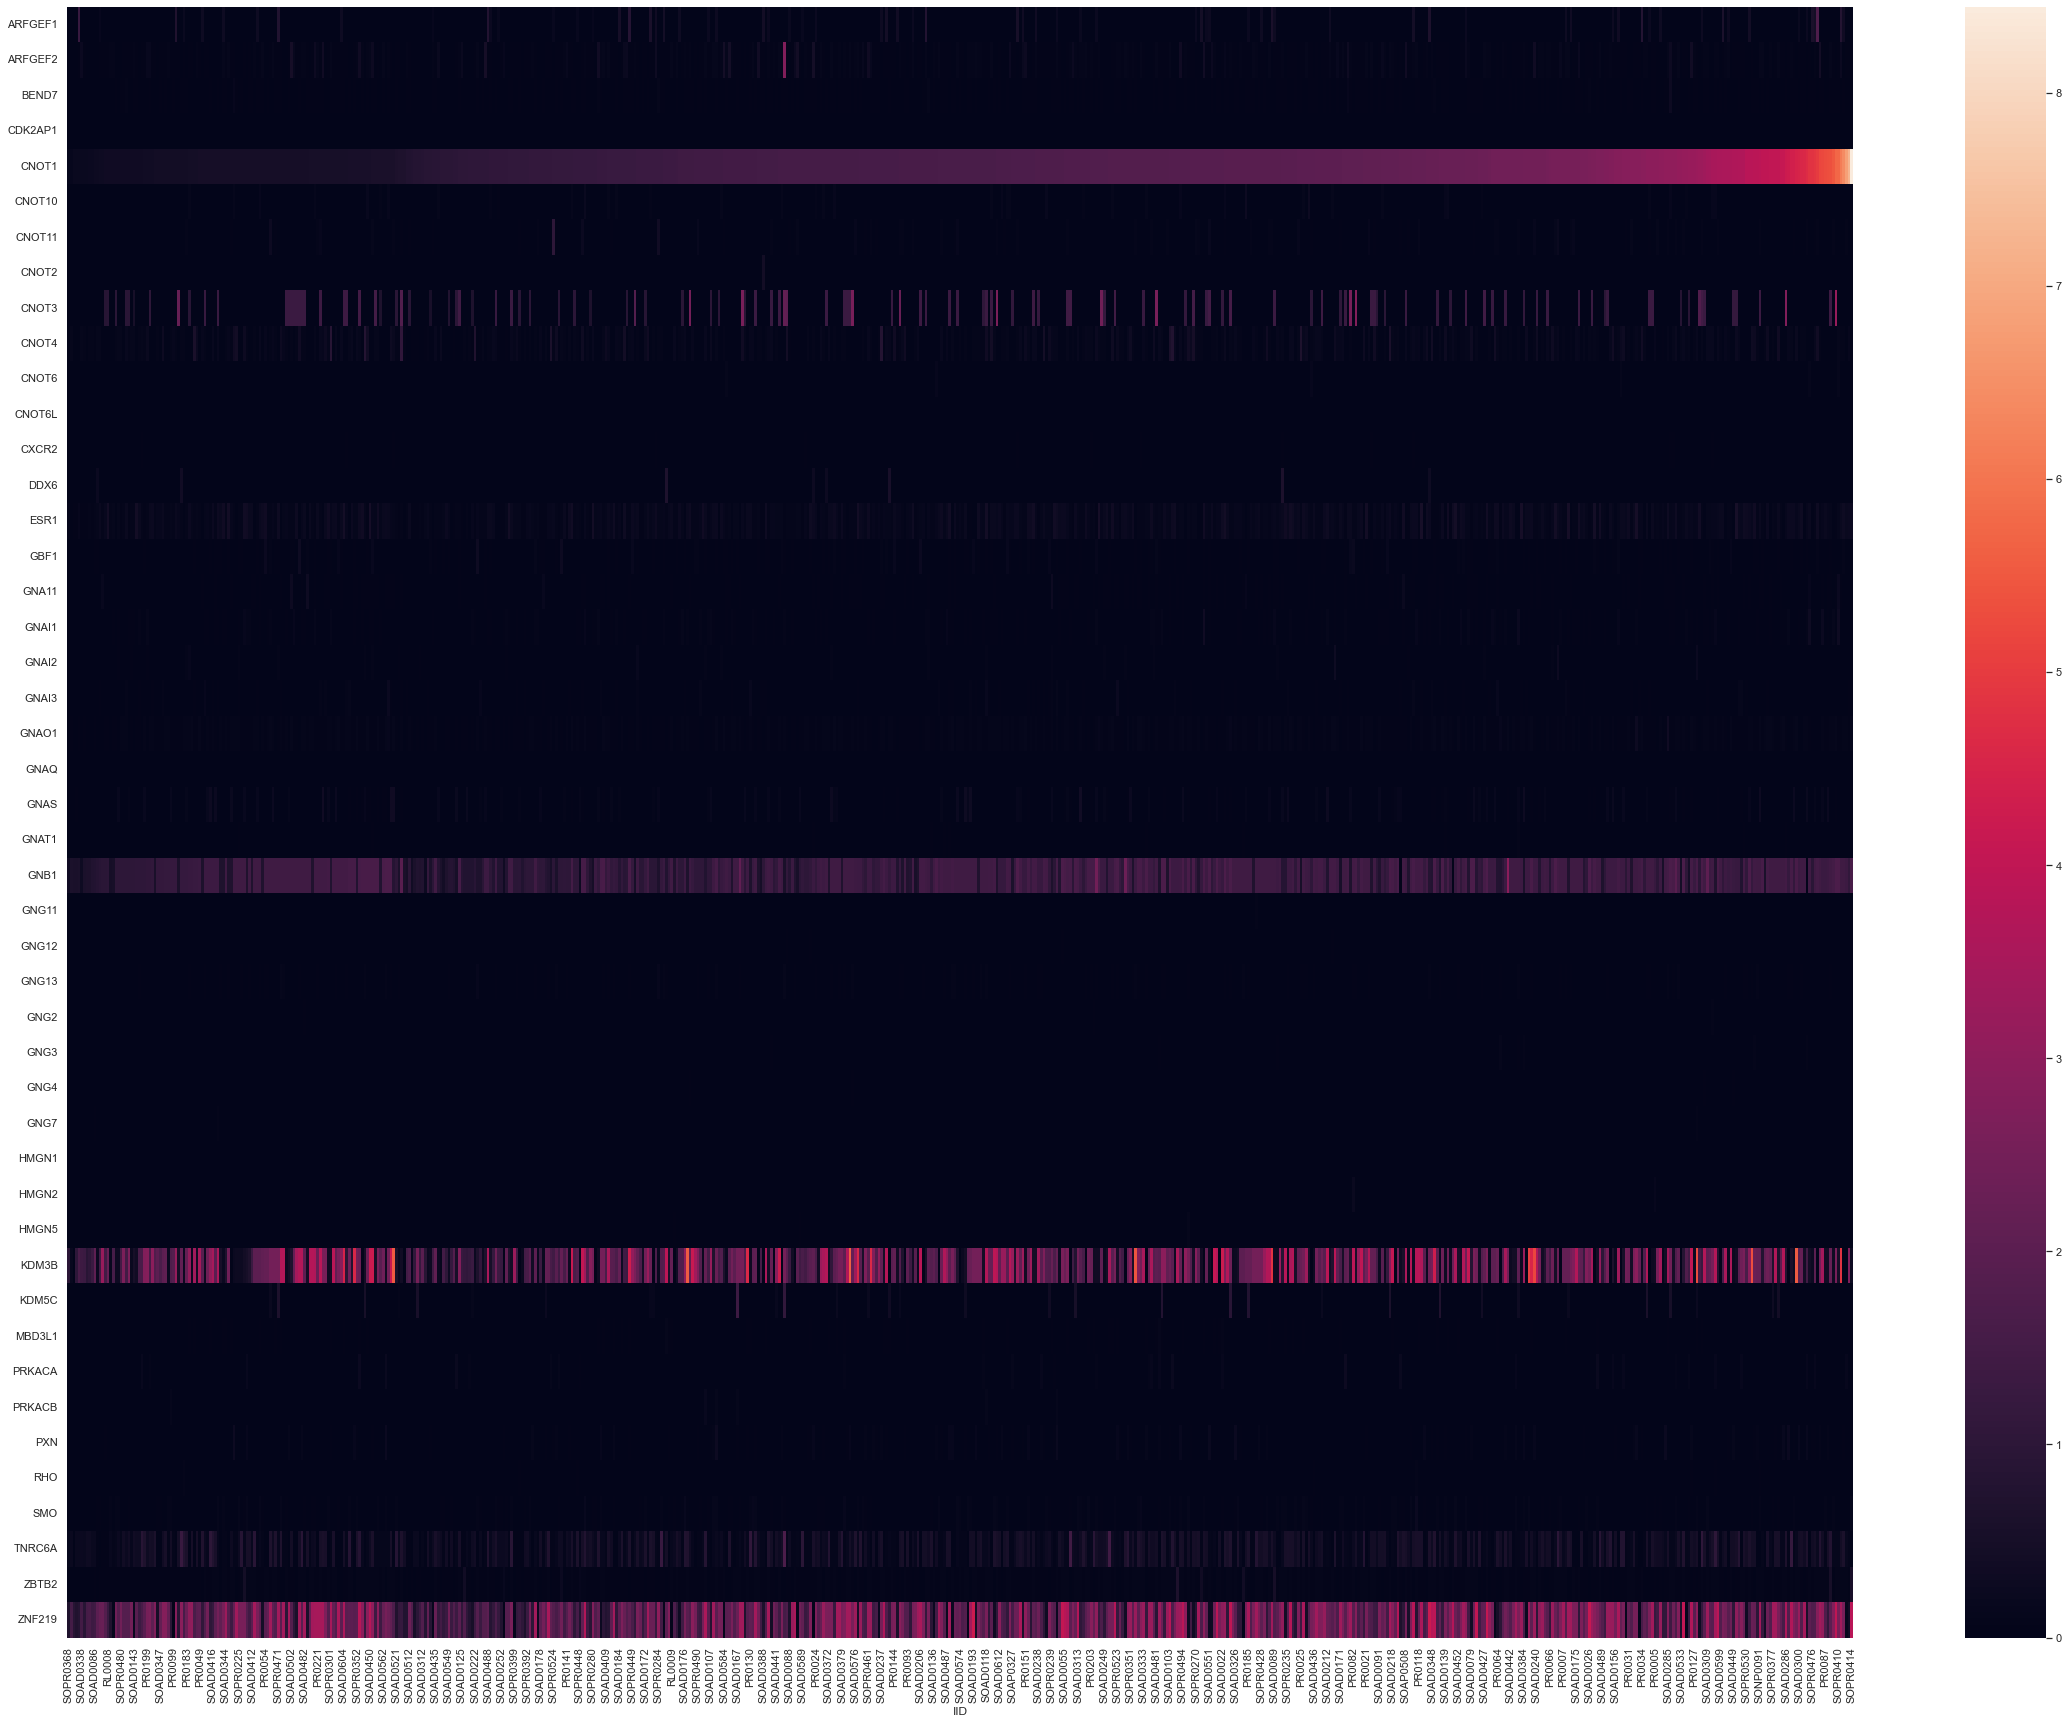

In [30]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(subPR.transpose())
plt.savefig('cnot.png', dpi=300)